# Fruits classification

## Importing Necessary Packages 


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from matplotlib import cm
import pylab as pl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
# read dataset
fruits = pd.read_table('fruit_data_with_colors.txt')


## Exploratory Data Analysis

In [3]:
# Check first five rows of dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
#Check size of dataset
fruits.shape

(59, 7)

In [35]:
# Checking a concise summary of a Dataset.
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [6]:
# Checking total missing values
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [7]:
# Checking Summary statistics of the dataset
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [8]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [9]:
# Checking unique categories in fruit_name column
pd.unique(fruits['fruit_name'])

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [10]:
# Checking unique categories in fruit_subtype column
pd.unique(fruits['fruit_subtype'])

array(['granny_smith', 'mandarin', 'braeburn', 'golden_delicious',
       'cripps_pink', 'spanish_jumbo', 'selected_seconds', 'turkey_navel',
       'spanish_belsan', 'unknown'], dtype=object)

In [11]:
len(pd.unique(fruits['fruit_subtype']))

10

In [66]:
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [13]:
pd.unique(fruits['fruit_label'])

array([1, 2, 3, 4])

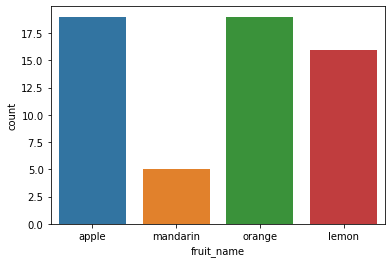

In [34]:
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

#### The data is almost balanced except mandarin

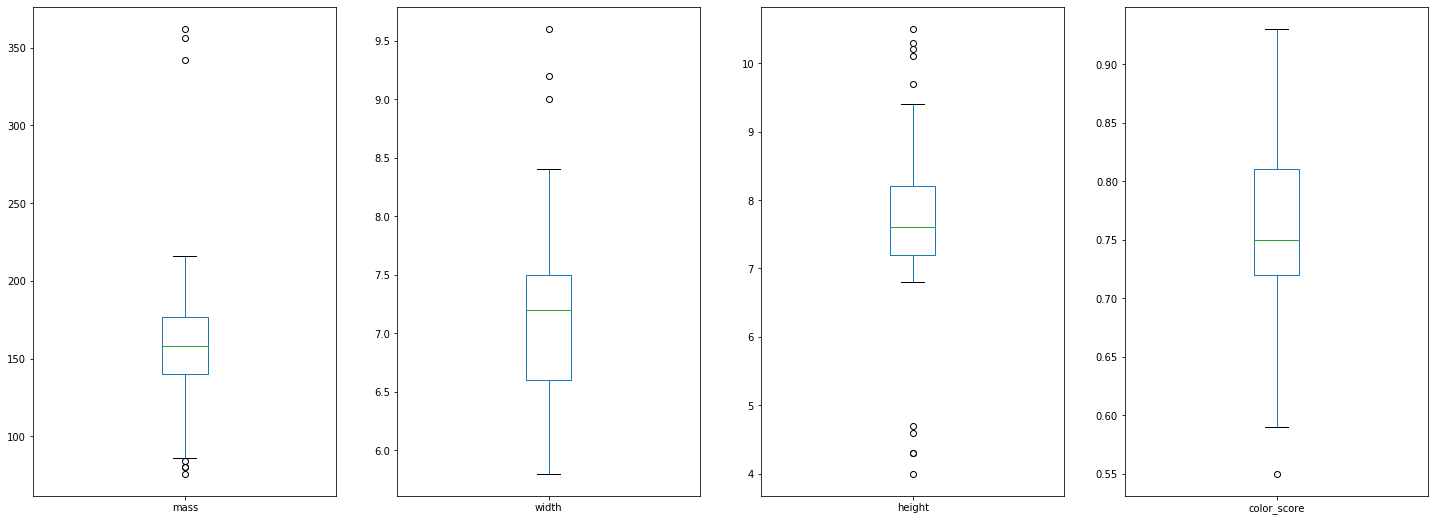

In [70]:
# Checking for outliers for each numeric variables except fruit_label
df = fruits.drop(columns='fruit_label')
df.plot(kind='box',subplots=True,figsize=(25,9))
plt.show()

#### Above box plot give us a clearer idea of the distribution of the input variables

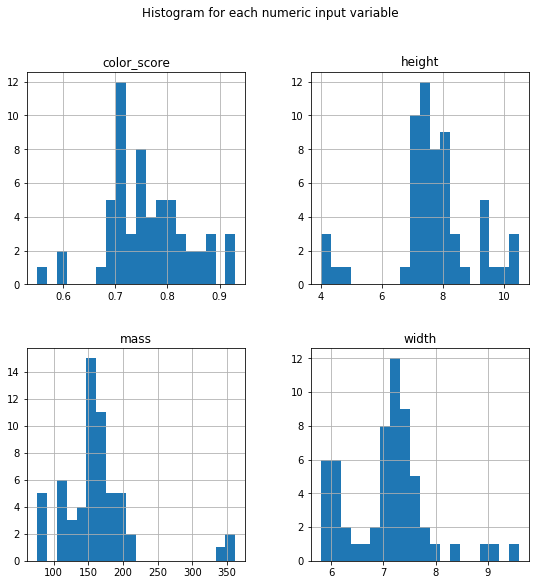

In [75]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=20, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

#### Color score has a near Gaussian distribution.

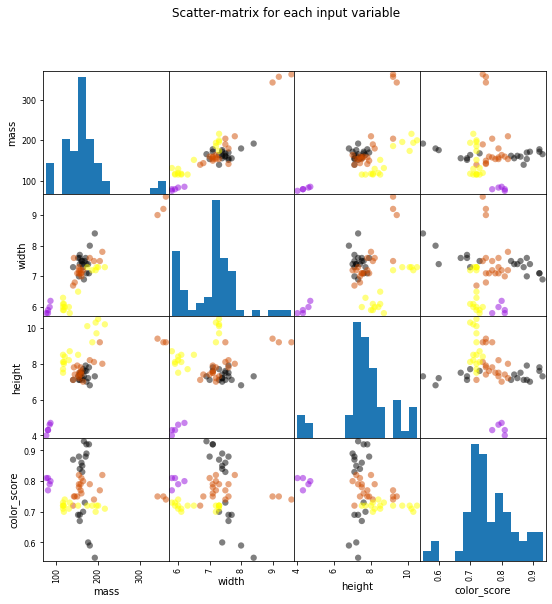

In [17]:
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

#### There is a high correlation between mass and width

### Creating Training and Test Sets

In [78]:
#Create Training and Test Sets and Apply Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=0)


In [22]:
X_train.shape

(41, 4)

In [23]:
X_test.shape

(18, 4)

In [24]:
X_train.head()

,mass,width,height,color_score
14,152,7.6,7.3,0.69
32,164,7.2,7.0,0.80
49,132,5.8,8.7,0.73
29,160,7.0,7.4,0.81
37,154,7.3,7.3,0.79


In [25]:
X_test.head()

,mass,width,height,color_score
26,362,9.6,9.2,0.74
35,150,7.1,7.9,0.75
43,194,7.2,10.3,0.70
28,140,6.7,7.1,0.72
11,172,7.1,7.6,0.92


### Apply Scaling 

In [77]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building

###  Logistic Regression 

In [27]:
logreg = LogisticRegression(random_state=0)
# training model
logreg.fit(X_train, y_train)
print('Train accuracy:',round(logreg.score(X_train,y_train),2))
print('Test accuracy:',round(logreg.score(X_test,y_test),2))

Train accuracy: 0.68
Test accuracy: 0.39


###  Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print('Train accuracy:',round(clf.score(X_train,y_train),2))
print('Test accuracy:',round(clf.score(X_test,y_test),2))

Train accuracy: 1.0
Test accuracy: 0.89


###  K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Train accuracy:',round(knn.score(X_train,y_train),2))
print('Test accuracy:',round(knn.score(X_test,y_test),2))

Train accuracy: 0.95
Test accuracy: 1.0


###  Linear Discriminant Analysis

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Train accuracy:',round(lda.score(X_train,y_train),2))
print('Test accuracy:',round(lda.score(X_test,y_test),2))

Train accuracy: 0.88
Test accuracy: 0.67


###  Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Train accuracy:',round(gnb.score(X_train,y_train),2))
print('Test accuracy:',round(gnb.score(X_test,y_test),2))

Train accuracy: 0.88
Test accuracy: 0.67


###  Support Vector Machine

In [32]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Train accuracy:',round(svm.score(X_train,y_train),2))
print('Test accuracy:',round(svm.score(X_test,y_test),2))

Train accuracy: 0.61
Test accuracy: 0.28


#### The KNN algorithm was the most accurate model from all above algorithms we tried. 

## Model Evaluation

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print('\n Full Report')
print(classification_report(y_test, pred))

Confusion Matrix:
 [[0 0 4 0]
 [0 0 2 0]
 [0 0 9 0]
 [0 0 3 0]]

 Full Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.50      1.00      0.67         9
           4       0.00      0.00      0.00         3

    accuracy                           0.50        18
   macro avg       0.12      0.25      0.17        18
weighted avg       0.25      0.50      0.33        18



#### The confusion matrix provides an indication of no error made on the test set